<a href="https://colab.research.google.com/github/mayureshwaric/loanapprovalprediction-app/blob/master/loan_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

Load the data.

In [93]:
loan_data  = pd.read_csv('loan_train.csv')
test_data = pd.read_csv('loan_test.csv')

In [94]:
print('Train Set:',loan_data.shape,'\nTest Set:',test_data.shape)


Train Set: (491, 14) 
Test Set: (123, 12)


In [95]:
loan_data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [96]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [97]:
#Remove the "Unnamed: 0" column from loan_data.
loan_data.drop('Unnamed: 0',axis=1,inplace=True)

In [98]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 50.0+ KB


In [99]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             120 non-null    object 
 2   Married            121 non-null    object 
 3   Dependents         117 non-null    object 
 4   Education          123 non-null    object 
 5   Self_Employed      120 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         117 non-null    float64
 9   Loan_Amount_Term   122 non-null    float64
 10  Credit_History     116 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 11.7+ KB


In [100]:
#Lets describe the dataset.
loan_data.describe(include='all')
test_data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,123,120,121,117,123,120,123.000000,123.000000,117.000000,122.000000,116.000000,123
unique,123,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP001116,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban
freq,1,96,74,69,92,102,NaN,NaN,NaN,NaN,NaN,47
mean,NaN,NaN,NaN,NaN,NaN,NaN,5412.520325,1747.048780,152.085470,344.754098,0.818966,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4691.249575,2962.400129,82.703623,57.499021,0.386717,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,210.000000,0.000000,9.000000,60.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2664.000000,0.000000,104.000000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3601.000000,1014.000000,131.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,6110.500000,2413.000000,180.000000,360.000000,1.000000,NaN


 Remove unwanted columns

In [101]:
#Remove the 'Loan_ID' feature as it has cardinality equal to the length of the dataset, so of not much use.
loan_data.drop('Loan_ID',axis=1,inplace=True)
test_data.drop('Loan_ID',axis=1,inplace=True)

Perform EDA.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

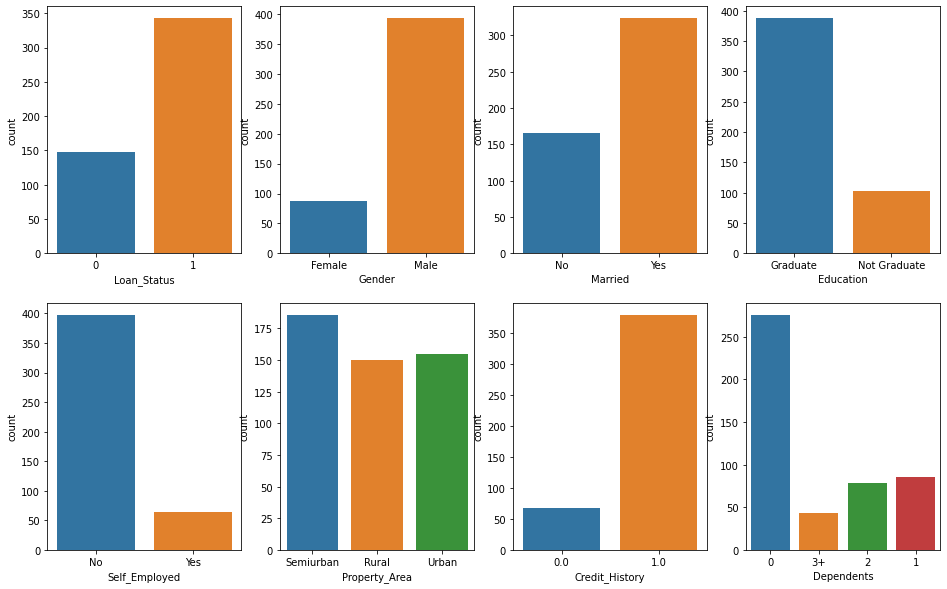

In [102]:
#Univariate Analysis
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=loan_data,ax=ax[0][0])
sns.countplot('Gender',data=loan_data,ax=ax[0][1])
sns.countplot('Married',data=loan_data,ax=ax[0][2])
sns.countplot('Education',data=loan_data,ax=ax[0][3])
sns.countplot('Self_Employed',data=loan_data,ax=ax[1][0])
sns.countplot('Property_Area',data=loan_data,ax=ax[1][1])
sns.countplot('Credit_History',data=loan_data,ax=ax[1][2])
sns.countplot('Dependents',data=loan_data,ax=ax[1][3])

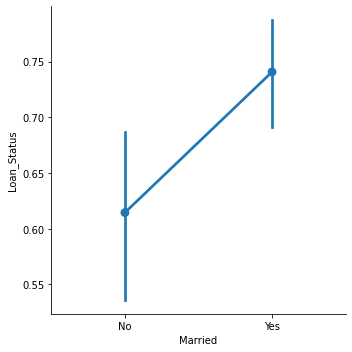

In [103]:
#Bivariate Analysis using Catplot
#Catplot - 'Married' Vs 'Loan_Status' 
sns.catplot(x="Married",y="Loan_Status",kind='point',data=loan_data)

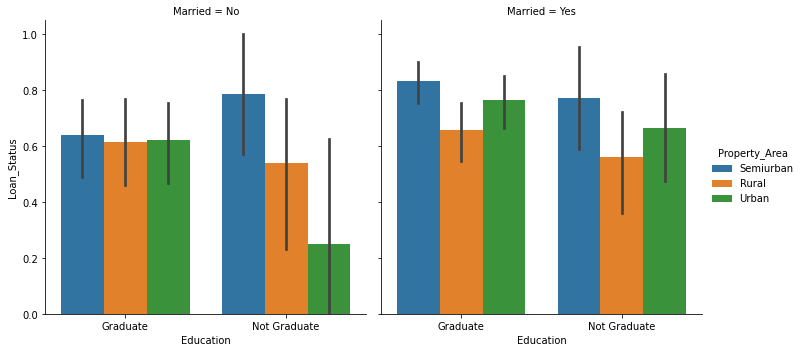

In [104]:
#Catplot - 'Education' Vs 'Loan_Status'
sns.catplot(x='Education',y='Loan_Status',kind='bar',data=loan_data,col='Married',hue='Property_Area')

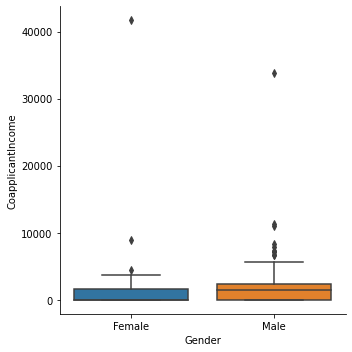

In [105]:
# Variable - 'Gender'  Vs 'CoapplicantIncome'
sns.catplot(x='Gender',y='CoapplicantIncome',data=loan_data,kind='box')

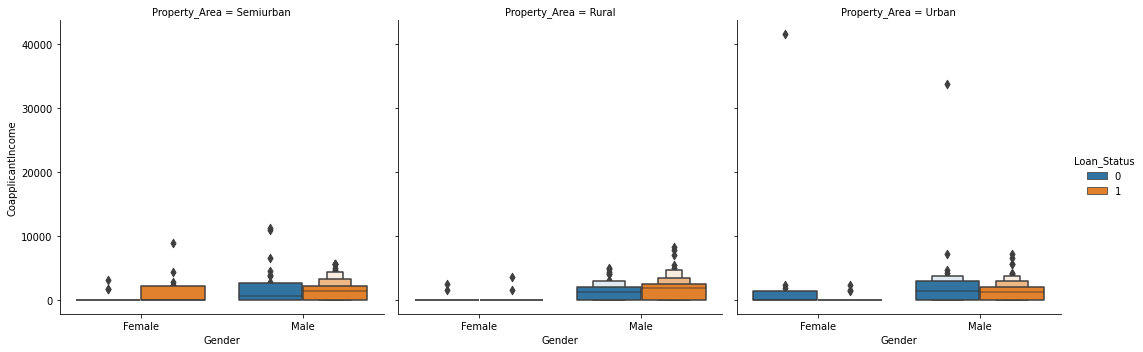

In [106]:
# Variable - 'Gender'  Vs 'CoapplicantIncome' with hue=Loan_Status and col=Property_Area
sns.catplot(x='Gender',y='CoapplicantIncome',data=loan_data,kind='boxen',hue='Loan_Status', col='Property_Area')

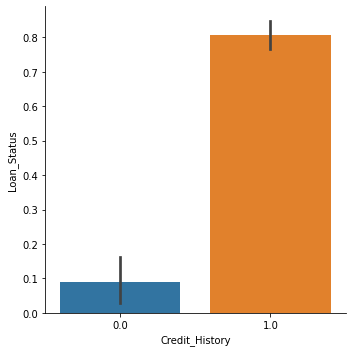

In [107]:
#Variable - 'Credit_History' Vs 'Loan_Status'
sns.catplot(x='Credit_History',y='Loan_Status',kind='bar',data=loan_data)

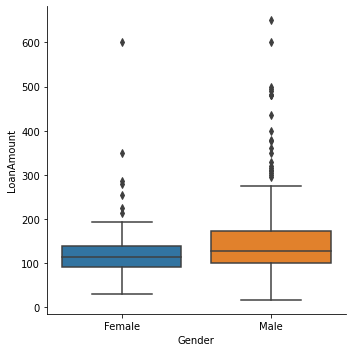

In [108]:
# Variable - 'Gender' Vs 'LoanAmount'
sns.catplot(x='Gender',y='LoanAmount',data=loan_data,kind='box')

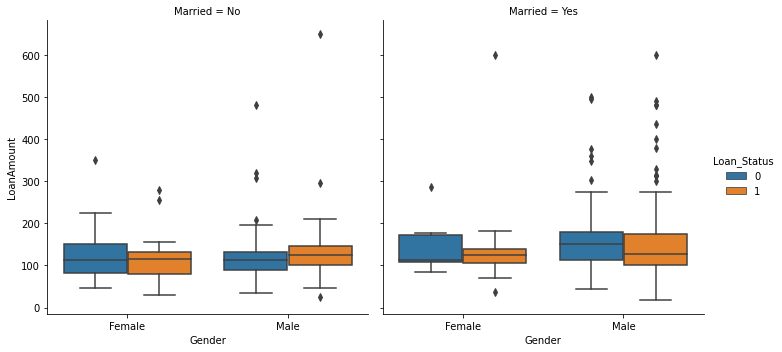

In [109]:
# Variable - 'Gender' Vs 'LoanAmount', hue='Loan_Status', col='Married'
sns.catplot(x='Gender',y='LoanAmount',data=loan_data,kind='box',hue='Loan_Status', col='Married')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


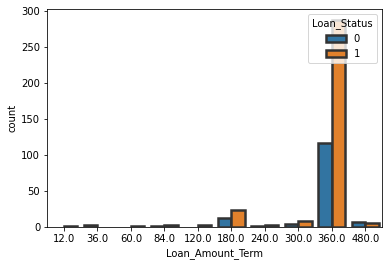

In [110]:
# Variable - 'Loan_Amount_Term' Vs 'Loan_Status'
sns.countplot('Loan_Amount_Term',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=loan_data)

Impute Missing values.

In [111]:
#Check for Nulls
loan_data.isnull().sum()

test_data.isnull().sum()

Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [112]:
#Total rows with null values
loan_data.shape[0] - loan_data.dropna().shape[0]

110

In [113]:
#There are nulls and we shall have to analyze each of the feature to see how to impute/not.
#Nulls in Gender:
loan_data[loan_data.Gender.isnull()]

test_data[test_data.Gender.isnull()]

loan_data.Gender.value_counts()

Male      393
Female     88
Name: Gender, dtype: int64

In [114]:
#Lets replace with Mode for gender.
mode_gender=loan_data.Gender.mode()[0]
print(mode_gender)
loan_data.Gender.fillna(mode_gender,inplace=True)
test_data.Gender.fillna(mode_gender,inplace=True)

Male


In [115]:
#Check if its imputed properly or not.
print(loan_data.loc[59])
print(test_data.loc[66])

Gender                   Male
Married                   Yes
Dependents                 3+
Education            Graduate
Self_Employed              No
ApplicantIncome         51763
CoapplicantIncome         0.0
LoanAmount              700.0
Loan_Amount_Term        300.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 1
Name: 59, dtype: object
Gender                    Male
Married                     No
Dependents                  3+
Education             Graduate
Self_Employed              Yes
ApplicantIncome           9357
CoapplicantIncome          0.0
LoanAmount               292.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Name: 66, dtype: object


In [116]:
#Nulls in 'Married' feature
loan_data[loan_data.Married.isnull()]

test_data[test_data.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
29,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
48,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban


In [117]:
mode_married=loan_data.Married.mode()[0]
print(mode_married)

loan_data.Married.fillna(mode_married,inplace=True)
test_data.Married.fillna(mode_married,inplace=True)

Yes


In [118]:
loan_data.loc[41]

test_data.loc[29]

Gender                  Female
Married                    Yes
Dependents                 NaN
Education             Graduate
Self_Employed               No
ApplicantIncome          10047
CoapplicantIncome          0.0
LoanAmount                 NaN
Loan_Amount_Term         240.0
Credit_History             1.0
Property_Area        Semiurban
Name: 29, dtype: object

In [119]:
#Nulls in Dependents
loan_data[loan_data.Dependents.isnull()]

test_data[test_data.Dependents.isnull()]

loan_data.Dependents.value_counts()

0     276
1      85
2      78
3+     43
Name: Dependents, dtype: int64

In [120]:
mode_Dependents=loan_data.Dependents.mode()[0]
print(mode_Dependents)

loan_data.Dependents.fillna(mode_Dependents,inplace=True)
test_data.Dependents.fillna(mode_Dependents,inplace=True)

0


In [121]:
print(loan_data.loc[11])
print(test_data.loc[26])

Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3523
CoapplicantIncome          3230.0
LoanAmount                  152.0
Loan_Amount_Term            360.0
Credit_History                0.0
Property_Area               Rural
Loan_Status                     0
Name: 11, dtype: object
Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome         13650
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Name: 26, dtype: object


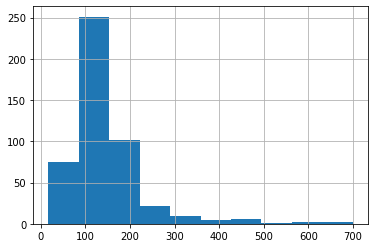

In [122]:
#Nulls in 'Self_Employed'
loan_data[loan_data.LoanAmount.isnull()]

test_data[test_data.LoanAmount.isnull()]

loan_data.LoanAmount.hist()

In [123]:
#As it is skewed, lets take median to impute.
median_loanamount=loan_data.LoanAmount.median()
print(median_loanamount)

loan_data.LoanAmount.fillna(median_loanamount,inplace=True)
test_data.LoanAmount.fillna(median_loanamount,inplace=True)

126.0


In [124]:
print(loan_data.loc[104])
print(test_data.loc[11])

Gender                       Male
Married                       Yes
Dependents                     3+
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3992
CoapplicantIncome             0.0
LoanAmount                  126.0
Loan_Amount_Term            180.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     0
Name: 104, dtype: object
Gender                  Female
Married                     No
Dependents                   1
Education             Graduate
Self_Employed              Yes
ApplicantIncome           7451
CoapplicantIncome          0.0
LoanAmount               126.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Name: 11, dtype: object


In [125]:
#Nulls in Loan_Amount_Term.
loan_data[loan_data.Loan_Amount_Term.isnull()]

test_data[test_data.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban


In [126]:
median_Loan_Amount_Term=loan_data.Loan_Amount_Term.mode()[0]
print(median_Loan_Amount_Term)

loan_data.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)
test_data.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)

360.0


In [127]:
print(loan_data.loc[3])
print(test_data.loc[25])

Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                 Yes
ApplicantIncome              4695
CoapplicantIncome             0.0
LoanAmount                   96.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     1
Name: 3, dtype: object
Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          1828
CoapplicantIncome      1330.0
LoanAmount              100.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area           Urban
Name: 25, dtype: object


In [128]:
loan_data.dropna(inplace=True)

In [129]:
loan_data.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
420,Male,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
421,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
422,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
423,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [130]:
#Nulls in Credit_History
loan_data[loan_data.Credit_History.isnull()]

test_data[test_data.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
31,Female,No,0,Graduate,No,3166,2985.0,132.0,360.0,NaN,Rural
45,Male,Yes,1,Not Graduate,No,4050,5302.0,138.0,360.0,NaN,Rural
57,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban
64,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural
67,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,NaN,Semiurban
103,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban
120,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban


In [131]:
mode_Credit_History=loan_data.Credit_History.mode()[0]
print(mode_Credit_History)

loan_data.Credit_History.fillna(mode_Credit_History,inplace=True)
test_data.Credit_History.fillna(mode_Credit_History,inplace=True)

1.0


In [132]:
print(test_data.loc[31])

Gender                 Female
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          3166
CoapplicantIncome      2985.0
LoanAmount              132.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Name: 31, dtype: object


In [133]:
loan_data.isnull().sum().sum()

test_data.isnull().sum().sum()

3

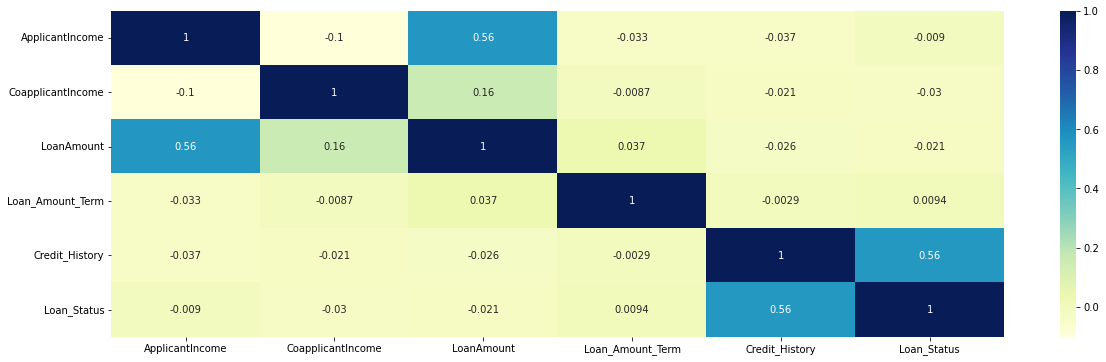

In [134]:
#Check for Correlations.
plt.figure(figsize=(20,6))
sns.heatmap(loan_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [135]:
#Loan_Status may have coorelation with Credit history but thats not too high.

Feature engineering

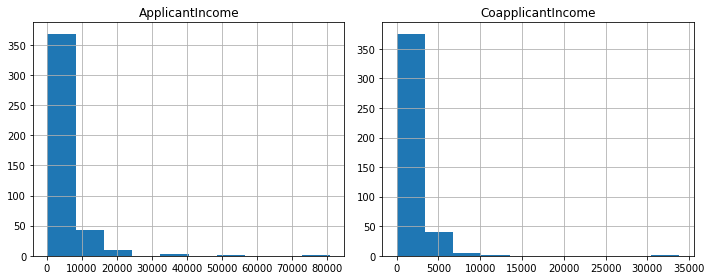

In [136]:
#Lets check distributions of ApplicantIncome and Coapplicant income.
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
loan_data.ApplicantIncome.hist()
plt.title('ApplicantIncome')
plt.subplot(1,2,2)
loan_data.CoapplicantIncome.hist()
plt.title('CoapplicantIncome')
plt.tight_layout()
plt.show()

In [137]:
"""They are skewed to right and may have lot of outliers as well.

As per the problem description, the LoanAmount applied by all the customers is in hundreds, so lets multiply LoanAmount column with 100."""
loan_data['LoanAmount'] = loan_data['LoanAmount'] * 100
test_data['LoanAmount'] = test_data['LoanAmount'] * 100

In [138]:
#combine train and test dataset
combine_set=pd.concat([loan_data,test_data], ignore_index=True)
combine_set.shape

(548, 12)

In [139]:
#add 8 new features to our datasets
#Add new features - Total income
combine_set['Total_Income'] = combine_set['ApplicantIncome'] + combine_set['CoapplicantIncome']
print(combine_set['Total_Income'])

0       4547.0
1       5703.0
2       6784.0
3       4695.0
4       8450.0
        ...   
543     6598.0
544     5191.0
545     3680.0
546    17263.0
547     3750.0
Name: Total_Income, Length: 548, dtype: float64


In [140]:
#Dropping unwanted columns - 'ApplicantIncome','CoapplicantIncome'
combine_set.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

combine_set.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Female,No,0,Graduate,No,11500.0,360.0,1.0,Semiurban,1.0,4547.0
1,Male,Yes,3+,Not Graduate,Yes,13000.0,360.0,1.0,Rural,1.0,5703.0
2,Female,Yes,0,Graduate,No,11000.0,360.0,1.0,Urban,0.0,6784.0
3,Male,Yes,0,Not Graduate,Yes,9600.0,360.0,1.0,Urban,1.0,4695.0
4,Male,Yes,2,Graduate,No,23000.0,300.0,1.0,Semiurban,1.0,8450.0


In [141]:
#EMI
#Lets assume that interest rate=10.0 # hence r = ((10/12)/100) = 0.00833

r = 0.00833
combine_set['EMI']=combine_set.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)
print(combine_set['EMI'])

0       96.592972
1      109.192056
2       92.393278
3       80.634133
4      193.185945
          ...    
543    155.388695
544    105.832300
545     85.673767
546    188.986250
547     97.432911
Name: EMI, Length: 548, dtype: float64


In [142]:
combine_set.head(2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,Female,No,0,Graduate,No,11500.0,360.0,1.0,Semiurban,1.0,4547.0,96.592972
1,Male,Yes,3+,Not Graduate,Yes,13000.0,360.0,1.0,Rural,1.0,5703.0,109.192056


In [143]:
# Dependents wise mean of EMI
combine_set['Dependents_EMI_mean']=combine_set.groupby(['Dependents'])['EMI'].transform('mean')
print(combine_set['Dependents_EMI_mean'])

0      110.882433
1      157.803519
2      110.882433
3      110.882433
4      128.264146
          ...    
543    110.882433
544    128.264146
545    110.882433
546    110.882433
547    132.567173
Name: Dependents_EMI_mean, Length: 548, dtype: float64


In [144]:
# LoanAmount_per_Total_Income
combine_set['LoanAmount_per_Total_Income']=combine_set['LoanAmount']/combine_set['Total_Income']
print(combine_set['LoanAmount_per_Total_Income'])

0      2.529140
1      2.279502
2      1.621462
3      2.044728
4      2.721893
         ...   
543    2.803880
544    2.427278
545    2.771739
546    1.303366
547    3.093333
Name: LoanAmount_per_Total_Income, Length: 548, dtype: float64


In [145]:
# Loan_Amount_Term_per_Total_Income
combine_set['Loan_Amount_Term_per_Total_Income']=combine_set['Loan_Amount_Term']/combine_set['Total_Income']
print(combine_set['Loan_Amount_Term_per_Total_Income'])

0      0.079173
1      0.063125
2      0.053066
3      0.076677
4      0.035503
         ...   
543    0.054562
544    0.069351
545    0.097826
546    0.020854
547    0.096000
Name: Loan_Amount_Term_per_Total_Income, Length: 548, dtype: float64


In [146]:
# EMI_per_Loan_Amount_Term
combine_set['EMI_per_Loan_Amount_Term']=combine_set['EMI']/combine_set['Loan_Amount_Term']
print(combine_set['EMI_per_Loan_Amount_Term'])

0      0.268314
1      0.303311
2      0.256648
3      0.223984
4      0.643953
         ...   
543    0.431635
544    0.293979
545    0.237983
546    0.524962
547    0.270647
Name: EMI_per_Loan_Amount_Term, Length: 548, dtype: float64


In [147]:
# EMI_per_LoanAmount
combine_set['EMI_per_LoanAmount']=combine_set['EMI']/combine_set['LoanAmount']
print(combine_set['EMI_per_LoanAmount'])

0      0.008399
1      0.008399
2      0.008399
3      0.008399
4      0.008399
         ...   
543    0.008399
544    0.008399
545    0.008399
546    0.008399
547    0.008399
Name: EMI_per_LoanAmount, Length: 548, dtype: float64


In [148]:
# Categorical variables wise mean of LoanAmount_per_Total_Income
combine_set['Property_Area_LoanAmount_per_Total_Income_mean']=combine_set.groupby(['Property_Area'])['LoanAmount_per_Total_Income'].transform('mean')
print(combine_set['Property_Area_LoanAmount_per_Total_Income_mean'])

0      2.428348
1      2.407397
2      2.306888
3      2.306888
4      2.428348
         ...   
543    2.428348
544    2.407397
545    2.428348
546    2.428348
547    2.428348
Name: Property_Area_LoanAmount_per_Total_Income_mean, Length: 548, dtype: float64


In [149]:
# Credit_History wise sum of Total_Income
combine_set['Credit_History_Income_Sum']=combine_set.groupby(['Credit_History'])['Total_Income'].transform('sum')
print(combine_set['Credit_History_Income_Sum'])

0      3.171223e+06
1      3.171223e+06
2      3.171223e+06
3      3.171223e+06
4      3.171223e+06
           ...     
543    3.171223e+06
544    3.171223e+06
545    3.171223e+06
546    3.171223e+06
547    3.171223e+06
Name: Credit_History_Income_Sum, Length: 548, dtype: float64


In [150]:
# Dependents wise sum of LoanAmount
combine_set['Dependents_LoanAmount_Sum']=combine_set.groupby(['Dependents'])['LoanAmount'].transform('sum')
print(combine_set['Dependents_LoanAmount_Sum'])

0      4224400.0
1       901800.0
2      4224400.0
3      4224400.0
4      1404900.0
         ...    
543    4224400.0
544    1404900.0
545    4224400.0
546    4224400.0
547    1388900.0
Name: Dependents_LoanAmount_Sum, Length: 548, dtype: float64


In [151]:
combine_set.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Dependents_EMI_mean,LoanAmount_per_Total_Income,Loan_Amount_Term_per_Total_Income,EMI_per_Loan_Amount_Term,EMI_per_LoanAmount,Property_Area_LoanAmount_per_Total_Income_mean,Credit_History_Income_Sum,Dependents_LoanAmount_Sum
0,Female,No,0,Graduate,No,11500.0,360.0,1.0,Semiurban,1.0,4547.0,96.592972,110.882433,2.529140,0.079173,0.268314,0.008399,2.428348,3.171223e+06,4224400.0
1,Male,Yes,3+,Not Graduate,Yes,13000.0,360.0,1.0,Rural,1.0,5703.0,109.192056,157.803519,2.279502,0.063125,0.303311,0.008399,2.407397,3.171223e+06,901800.0
2,Female,Yes,0,Graduate,No,11000.0,360.0,1.0,Urban,0.0,6784.0,92.393278,110.882433,1.621462,0.053066,0.256648,0.008399,2.306888,3.171223e+06,4224400.0
3,Male,Yes,0,Not Graduate,Yes,9600.0,360.0,1.0,Urban,1.0,4695.0,80.634133,110.882433,2.044728,0.076677,0.223984,0.008399,2.306888,3.171223e+06,4224400.0
4,Male,Yes,2,Graduate,No,23000.0,300.0,1.0,Semiurban,1.0,8450.0,193.185945,128.264146,2.721893,0.035503,0.643953,0.008399,2.428348,3.171223e+06,1404900.0


In [152]:
#Bin Formation for numeric columns
from sklearn.preprocessing import KBinsDiscretizer

Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(combine_set['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['Total_Income_Bins'] = Total_Income_discretizer.fit_transform(combine_set['Total_Income'].values.reshape(-1,1)).astype(float)

LoanAmount_per_Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
combine_set['LoanAmount_per_Total_Income_Bins'] = LoanAmount_per_Total_Income_discretizer.fit_transform(combine_set['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


In [153]:
#Drop unwanted columns
combine_set=combine_set.drop(['EMI'],axis=1)
combine_set=combine_set.drop(['Total_Income'],axis=1)
combine_set=combine_set.drop(['LoanAmount_per_Total_Income'],axis=1)

combine_set.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_EMI_mean,Loan_Amount_Term_per_Total_Income,EMI_per_Loan_Amount_Term,EMI_per_LoanAmount,Property_Area_LoanAmount_per_Total_Income_mean,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins
0,Female,No,0,Graduate,No,11500.0,360.0,1.0,Semiurban,1.0,110.882433,0.079173,0.268314,0.008399,2.428348,3.171223e+06,4224400.0,1.0,1.0,2.0
1,Male,Yes,3+,Not Graduate,Yes,13000.0,360.0,1.0,Rural,1.0,157.803519,0.063125,0.303311,0.008399,2.407397,3.171223e+06,901800.0,1.0,2.0,2.0
2,Female,Yes,0,Graduate,No,11000.0,360.0,1.0,Urban,0.0,110.882433,0.053066,0.256648,0.008399,2.306888,3.171223e+06,4224400.0,1.0,3.0,0.0
3,Male,Yes,0,Not Graduate,Yes,9600.0,360.0,1.0,Urban,1.0,110.882433,0.076677,0.223984,0.008399,2.306888,3.171223e+06,4224400.0,1.0,1.0,1.0
4,Male,Yes,2,Graduate,No,23000.0,300.0,1.0,Semiurban,1.0,128.264146,0.035503,0.643953,0.008399,2.428348,3.171223e+06,1404900.0,0.0,3.0,3.0


In [154]:
print("combine_set dataset shape: {0}".format(combine_set.shape))

combine_set dataset shape: (548, 20)


Build Machine Learning Model 

In [155]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,11500.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,13000.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,11000.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,9600.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,23000.0,300.0,1.0,Semiurban,1


In [156]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [157]:
loan_data.reset_index(drop=True,inplace=True)

In [158]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,11500.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,13000.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,11000.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,9600.0,360.0,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,23000.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
420,Male,Yes,1,Graduate,Yes,9833,1833.0,18200.0,180.0,1.0,Urban,1
421,Female,No,1,Graduate,No,3812,0.0,11200.0,360.0,1.0,Rural,1
422,Male,Yes,1,Graduate,No,14583,0.0,18500.0,180.0,1.0,Rural,1
423,Male,No,0,Graduate,No,1836,33837.0,9000.0,360.0,1.0,Urban,0


In [159]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']

In [160]:
"""for i in cat_cols:
  print(i)
  print("Train set:",sorted(loan_data[i].unique()))
  print("Test set:",sorted(test_data[i].unique()))"""

'for i in cat_cols:\n  print(i)\n  print("Train set:",sorted(loan_data[i].unique()))\n  print("Test set:",sorted(test_data[i].unique()))'

In [161]:
# One Hot encoding for categorical features.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
load_df_encoded = ohe.fit_transform(loan_data[cat_cols]).toarray()
test_df_encoded = ohe.transform(test_data[cat_cols]).toarray()

In [162]:
load_df_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [163]:
len(load_df_encoded)

425

In [164]:
len(loan_data)

425

In [165]:
loan_df=loan_data.drop(cat_cols,axis=1)
print(loan_df.shape)
test_df=test_data.drop(cat_cols,axis=1)
print(test_df.shape)

(425, 5)
(123, 4)


In [166]:
loan_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,4547,0.0,11500.0,360.0,1
1,5703,0.0,13000.0,360.0,1
2,4333,2451.0,11000.0,360.0,0
3,4695,0.0,9600.0,360.0,1
4,6700,1750.0,23000.0,300.0,1
...,...,...,...,...,...
420,9833,1833.0,18200.0,180.0,1
421,3812,0.0,11200.0,360.0,1
422,14583,0.0,18500.0,180.0,1
423,1836,33837.0,9000.0,360.0,0


In [167]:
loan_df=pd.concat([loan_df,pd.DataFrame(load_df_encoded, columns=ohe.get_feature_names(loan_data[cat_cols].columns))],axis=1);print(loan_df.shape)
test_df=pd.concat([test_df,pd.DataFrame(test_df_encoded, columns=ohe.get_feature_names(test_data[cat_cols].columns))],axis=1);print(test_df.shape)

(425, 22)
(123, 21)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [168]:
loan_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
420,9833,1833.0,18200.0,180.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
421,3812,0.0,11200.0,360.0,1,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
422,14583,0.0,18500.0,180.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
423,1836,33837.0,9000.0,360.0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
424,2785,2016.0,11000.0,360.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [169]:
# Check for class imbalance
round(loan_df.Loan_Status.value_counts()/loan_df.shape[0]*100,2)

1    68.94
0    31.06
Name: Loan_Status, dtype: float64

In [170]:
"""There is imbalance, lets use SMOTE to increase the minority class synthetically.
Before that lets split the dataset into X and Y."""
X=loan_df.drop('Loan_Status',axis=1)
Y=loan_df.Loan_Status

In [171]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(382, 21) (43, 21) (382,) (43,)


In [172]:
Y_train.value_counts()

1    262
0    120
Name: Loan_Status, dtype: int64

In [173]:
#Apply SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
Y_train.value_counts()
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,3917,0.0,12400.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1782,2232.0,10700.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3583,0.0,9600.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4652,3583.0,12600.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4887,0.0,13300.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [174]:
# Scale the data
from sklearn.preprocessing import StandardScaler
ss2=StandardScaler()
X_train_scaled=pd.DataFrame(ss2.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(ss2.transform(X_test),columns=X_test.columns)
test_df_scaled=pd.DataFrame(ss2.transform(test_df),columns=test_df.columns)
print(X_train_scaled.shape,X_test_scaled.shape,test_df_scaled.shape)

(524, 21) (43, 21) (123, 21)


In [175]:
# Model building
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,Y_train)
print(logit)
Y_pred_logit=logit.predict(X_test)
f1_logit=f1_score(Y_test,Y_pred_logit)*100
print(f1_logit)
pd.DataFrame(logit.predict(test_df),columns=['prediction']).to_csv("LogisticRegression.csv",index=False)

LogisticRegression()
77.19298245614036


In [176]:
# Best Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42,n_estimators=150,max_depth=4)
rf.fit(X_train,Y_train)
print(rf)
Y_pred_rf=rf.predict(X_test)
f1_rf=f1_score(Y_test,Y_pred_rf)*100
print(f1_rf)
pd.DataFrame(rf.predict(test_df),columns=['prediction']).to_csv("RandomForestClassifier_Submission.csv",index=False)

RandomForestClassifier(max_depth=4, n_estimators=150, random_state=42)
91.1764705882353


In [177]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [178]:
loan_data.Property_Area.value_counts()

Semiurban    166
Rural        130
Urban        129
Name: Property_Area, dtype: int64

Pickel the model.

In [179]:
import pickle
with open('loan_application.pickle','wb') as f:
    pickle.dump(rf,f)

In [180]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))